<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Importing Libraries</h1>

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn  import svm
from sklearn.ensemble import RandomForestClassifier,VotingClassifier;
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree  import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.neighbors import LocalOutlierFactor
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN 
from collections import Counter
from sklearn.decomposition import PCA
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_palette
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
import warnings
warnings.filterwarnings("ignore")

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Data Content</h1>


 The data consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar.

* **obj_ID** = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
* **alpha** = Right Ascension angle (at J2000 epoch)
* **delta** = Declination angle (at J2000 epoch)
* **u** = Ultraviolet filter in the photometric system
* **g** = Green filter in the photometric system
* **r** = Red filter in the photometric system
* **i** = Near Infrared filter in the photometric system
* **z** = Infrared filter in the photometric system
* **run_ID** = Run Number used to identify the specific scan
* **rereun_ID** = Rerun Number to specify how the image was processed
* **cam_col** = Camera column to identify the scanline within the run
* **field_ID** = Field number to identify each field
* **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
* **class** = object class (galaxy, star or quasar object)
* **redshift** = redshift value based on the increase in wavelength
* **plate** = plate ID, identifies each plate in SDSS
* **MJD** = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Importing Data</h1>

In [8]:
df=pd.read_csv('star_classification.csv')

In [10]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

In [12]:
df.tail()

obj_ID       alpha      delta         u         g         r  \
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [16]:
df.describe()

obj_ID          alpha          delta              u  \
count  1.000000e+05  100000.000000  100000.000000  100000.000000   
mean   1.237665e+18     177.629117      24.135305      21.980468   
std    8.438560e+12      96.502241      19.644665      31.769291   
min    1.237646e+18       0.005528     -18.785328   -9999.000000   
25%    1.237659e+18     127.518222       5.146771      20.352353   
50%    1.237663e+18     180.900700      23.645922      22.179135   
75%    1.237668e+18     233.895005      39.901550      23.687440   
max    1.237681e+18     359.999810      83.000519      32.781390   

                   g              r              i              z  \
count  100000.000000  100000.000000  100000.000000  100000.000000   
mean       20.531387      19.645762      19.084854      18.668810   
std        31.750292       1.854760       1.757895      31.728152   
min     -9999.000000       9.822070       9.469903   -9999.000000   
25%        18.965230      18.135828      17.732285      17.460677   
50%        21.099835      20.125290      19.405145      19.004595   
75%        22.123767      21.044785      20.396495      19.921120   
max        31.602240      29.571860      32.141470      29.383740   

              run_ID  rerun_ID        cam_col       field_ID   spec_obj_ID  \
count  100000.000000  100000.0  100000.000000  100000.000000  1.000000e+05   
mean     4481.366060     301.0       3.511610     186.130520  5.783882e+18   
std      1964.764593       0.0       1.586912     149.011073  3.324016e+18   
min       109.000000     301.0       1.000000      11.000000  2.995191e+17   
25%      3187.000000     301.0       2.000000      82.000000  2.844138e+18   
50%      4188.000000     301.0       4.000000     146.000000  5.614883e+18   
75%      5326.000000     301.0       5.000000     241.000000  8.332144e+18   
max      8162.000000     301.0       6.000000     989.000000  1.412694e+19   

            redshift          plate            MJD       fiber_ID  
count  100000.000000  100000.000000  100000.000000  100000.000000  
mean        0.576661    5137.009660   55588.647500     449.312740  
std         0.730707    2952.303351    1808.484233     272.498404  
min        -0.009971     266.000000   51608.000000       1.000000  
25%         0.054517    2526.000000   54234.000000     221.000000  
50%         0.424173    4987.000000   55868.500000     433.000000  
75%         0.704154    7400.250000   56777.000000     645.000000  
max         7.011245   12547.000000   58932.000000    1000.000000

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Analysing data for Missing and Duplicate values</h1>

In [19]:
df.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [21]:
df_dup=df[df.duplicated()]
df_dup.head()

Empty DataFrame
Columns: [obj_ID, alpha, delta, u, g, r, i, z, run_ID, rerun_ID, cam_col, field_ID, spec_obj_ID, class, redshift, plate, MJD, fiber_ID]
Index: []

# Inference 

* We dont have any null values and No duplicates found in the data.

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Categorical Feature Analysis</h1>

In [26]:
categorical_list = ["class"]

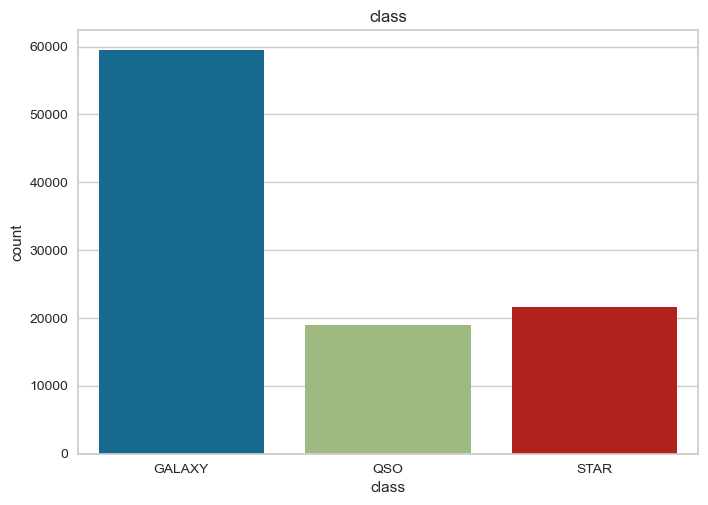

In [28]:
df_cat = df[categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_cat,hue = "class")
    plt.title(i)

In [30]:
df['class'].value_counts()

class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

In [32]:
#We are using lable-encoder function
le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])

# Or we can use manual logic to apply label-encoder without function
##df["class"]=[0 if i == "GALAXY" else 1 if i == "STAR" else 2 for i in df["class"]]

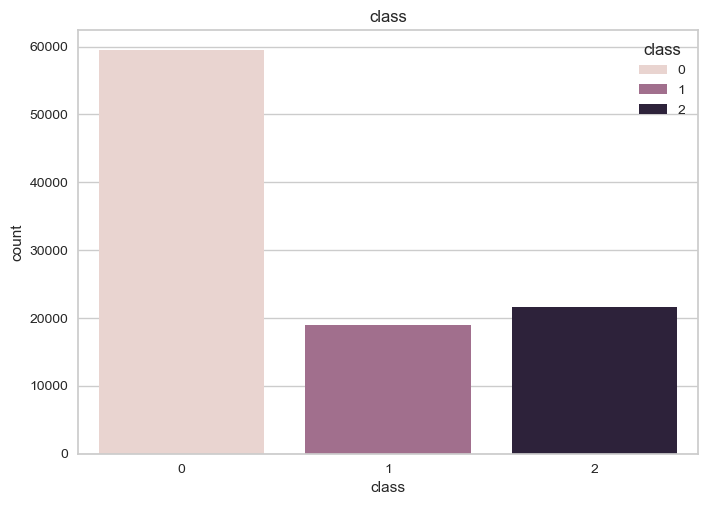

In [34]:
df_cat = df[categorical_list]
for i in categorical_list:
    plt.figure()
    sns.countplot(x = i, data = df_cat,hue = "class")
    plt.title(i)

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Detect Outliers and Handling Outliers</h1>

In [37]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'redshift',
       'plate', 'MJD', 'fiber_ID'],
      dtype='object')

In [39]:
num_list=['obj_ID', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 'run_ID',
       'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'redshift',
       'plate', 'MJD', 'fiber_ID']

In [41]:
df_num=df[num_list]

In [43]:
df_num.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

   redshift  plate    MJD  fiber_ID  
0  0.634794   5812  56354       171  
1  0.779136  10445  58158       427  
2  0.644195   4576  55592       299  
3  0.932346   9149  58039       775  
4  0.116123   6121  56187       842

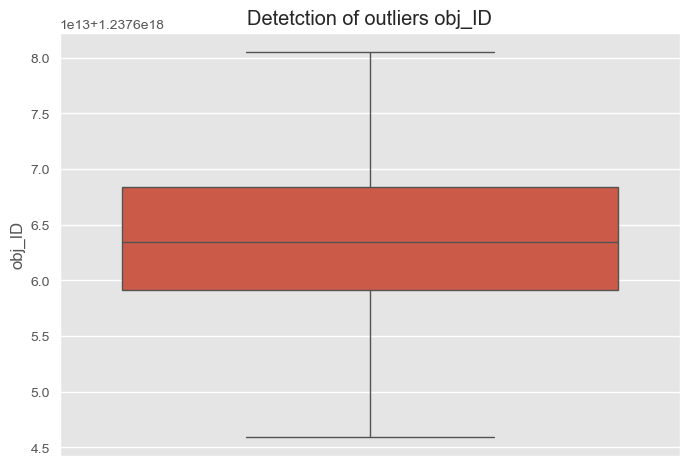

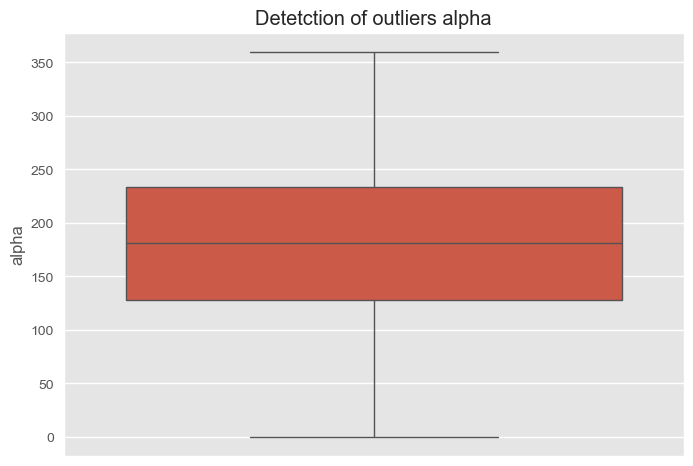

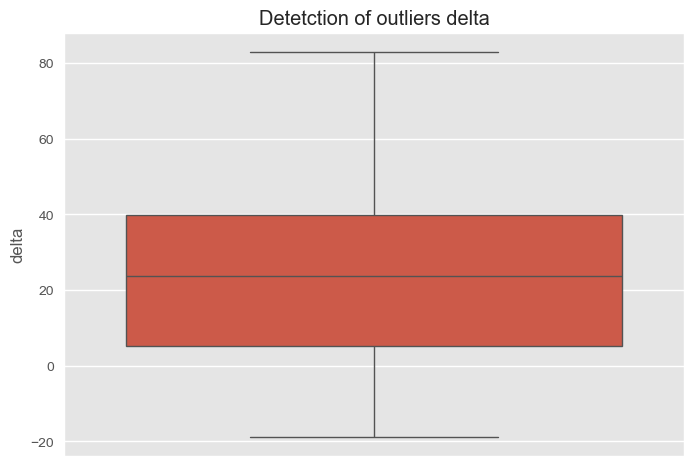

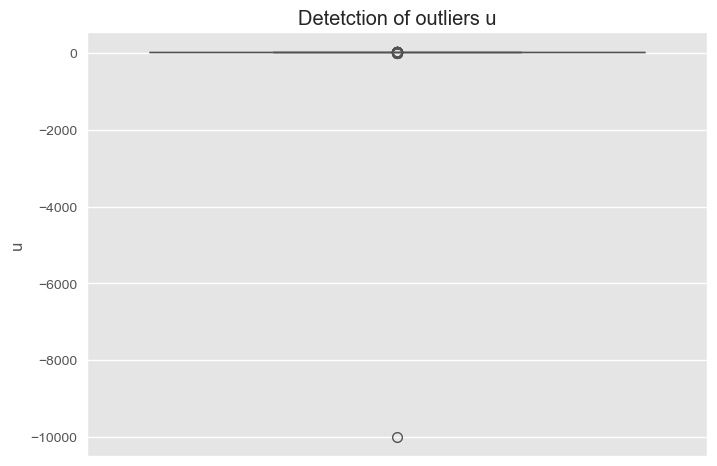

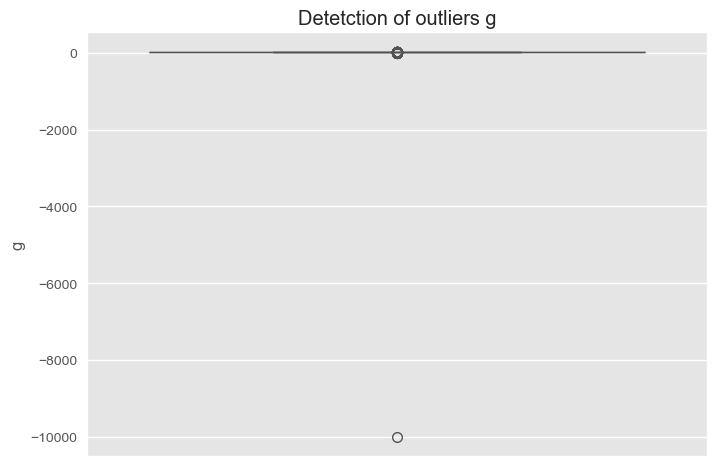

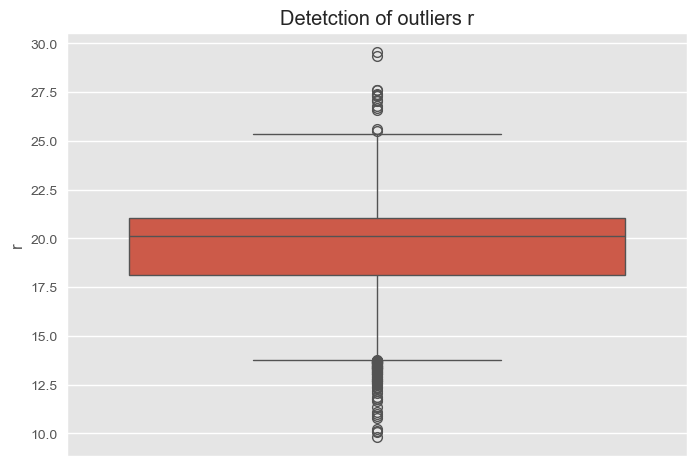

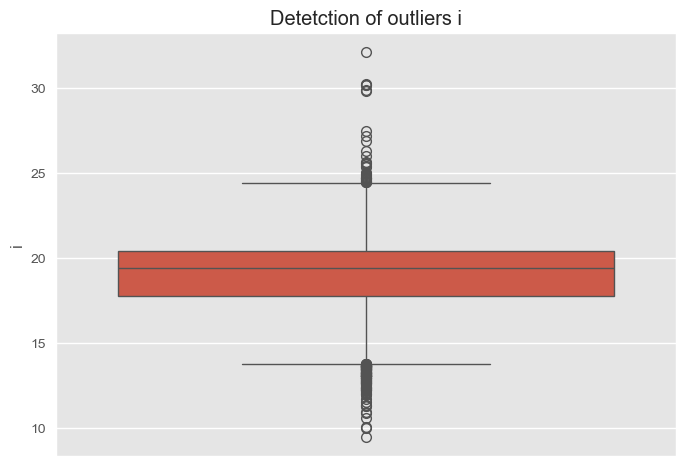

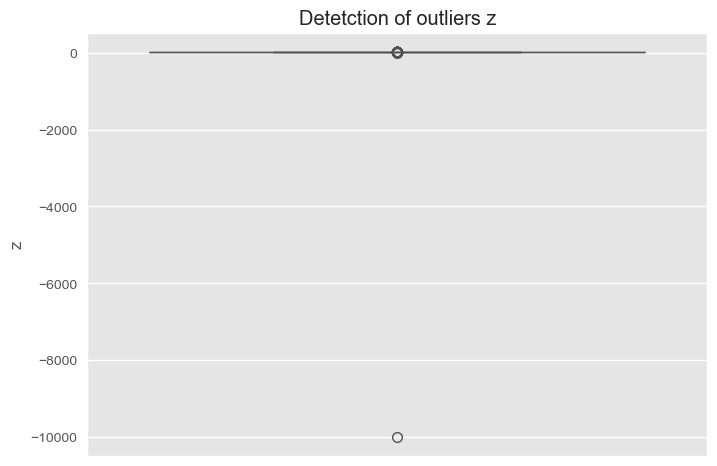

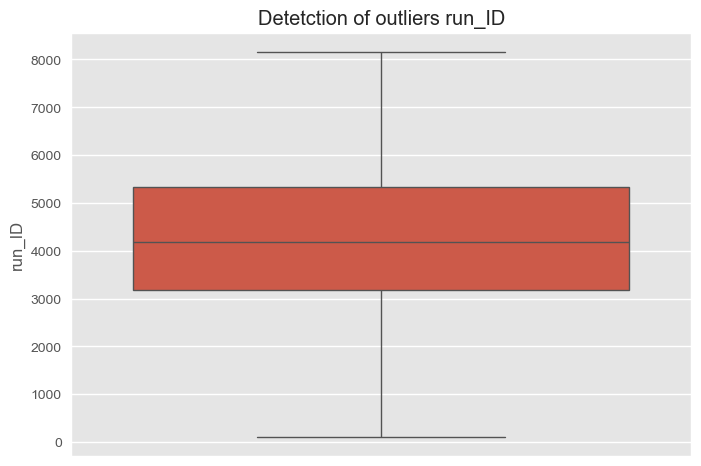

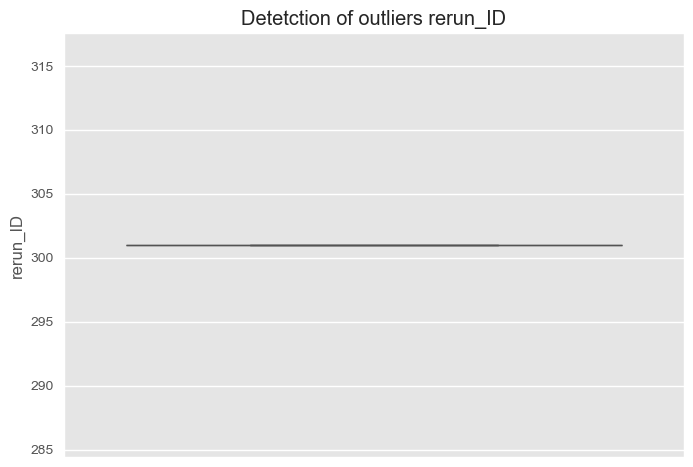

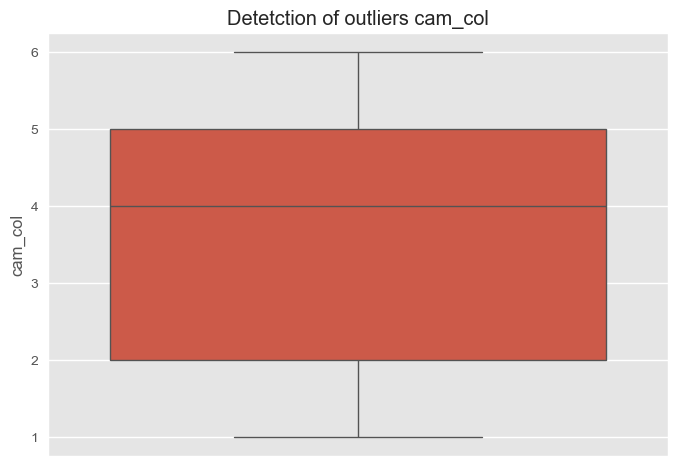

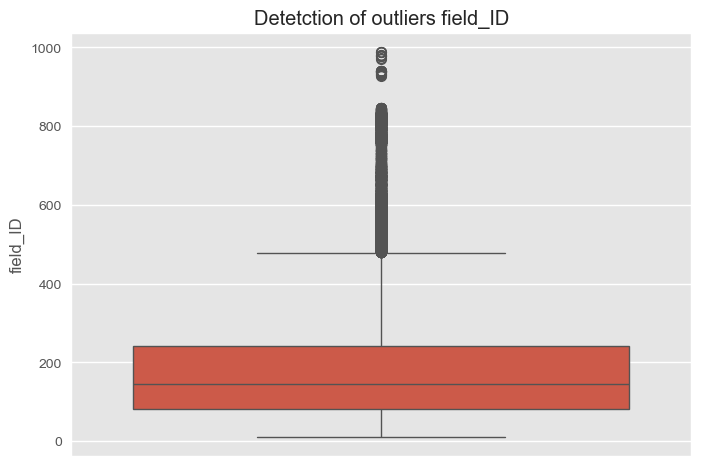

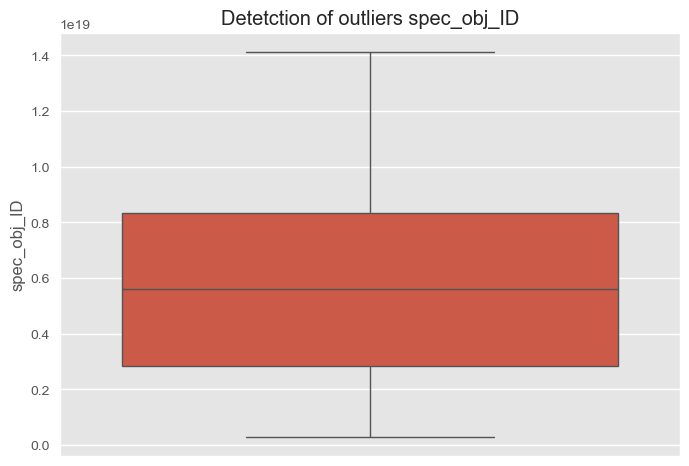

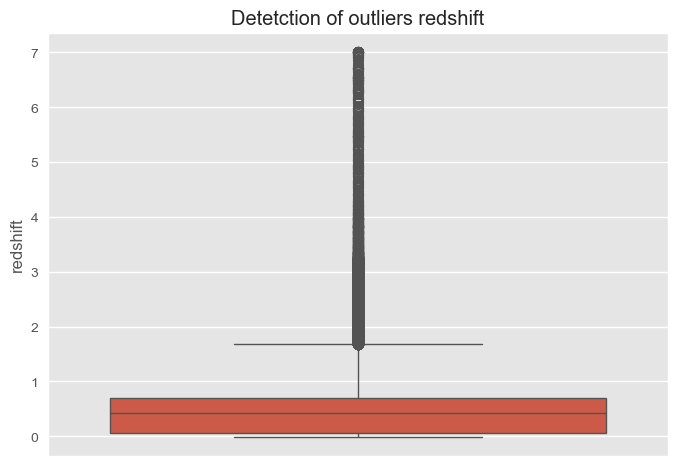

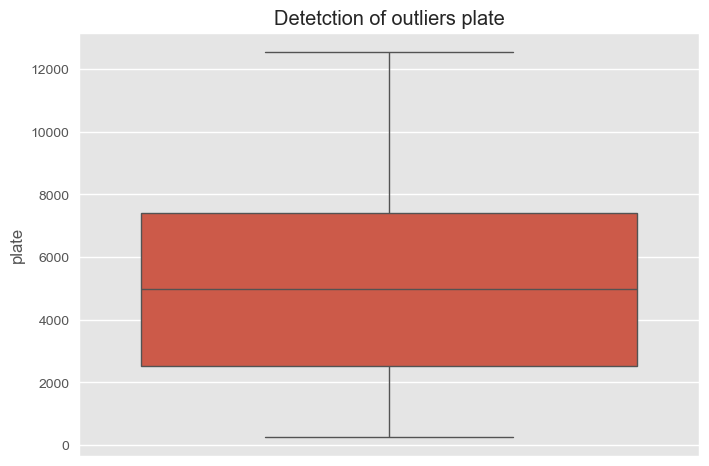

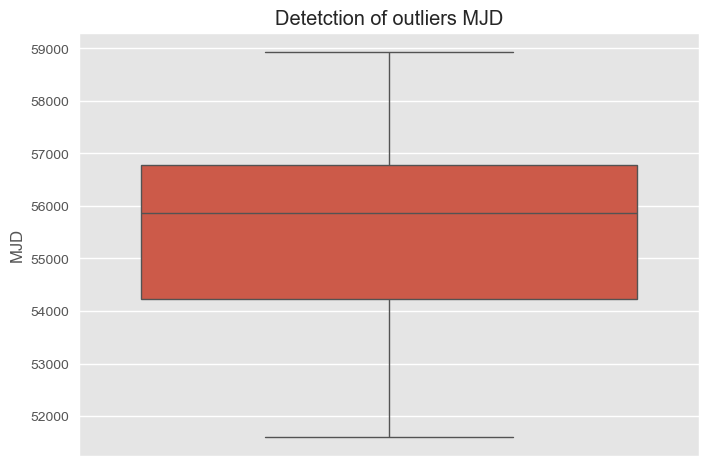

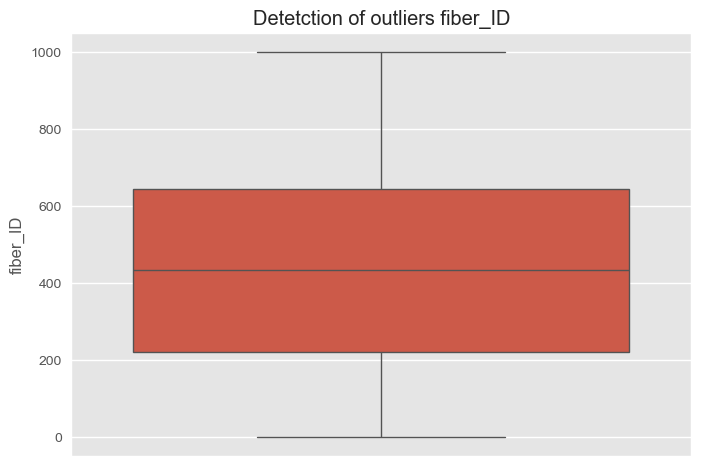

In [45]:
for col in num_list:
    plt.style.use('ggplot')
    sns.boxplot(df[col])
    plt.title('Detetction of outliers {}'.format(col))
    plt.show()

In [47]:
outlier_list=['r','i','redshift']
series = df[outlier_list]
Q1 = series.quantile(0.25)
Q3 = series.quantile(0.75)
multiplier = 1.5
IQR = Q3 - Q1
lower_bound = Q1 - multiplier * IQR
upper_bound = Q3 + multiplier * IQR

# Function to handle outliers using different methods
def handle_outliers(series, lower_cap=None, upper_cap=None):
    series = np.log1p(series)
    return series

#Calling 
# Apply the function to handle outliers in the 'value' column
df['r_log'] = handle_outliers(df['r'], lower_cap=lower_bound, upper_cap=upper_bound)
df['i_log'] = handle_outliers(df['i'], lower_cap=lower_bound, upper_cap=upper_bound)
df['redshift_log'] = handle_outliers(df['redshift'], lower_cap=lower_bound, upper_cap=upper_bound)

# Display the DataFrame after handling outliers

In [49]:
df.head()

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  ...  field_ID   spec_obj_ID  class  \
0  19.16573  18.79371    3606       301  ...        79  6.543777e+18      0   
1  21.16812  21.61427    4518       301  ...       119  1.176014e+19      0   
2  19.34857  18.94827    3606       301  ...       120  5.152200e+18      0   
3  20.50454  19.25010    4192       301  ...       214  1.030107e+19      0   
4  15.97711  15.54461    8102       301  ...       137  6.891865e+18      0   

   redshift  plate    MJD  fiber_ID     r_log     i_log  redshift_log  
0  0.634794   5812  56354       171  3.063158  3.003985      0.491517  
1  0.779136  10445  58158       427  3.160587  3.098655      0.576128  
2  0.644195   4576  55592       299  3.073145  3.013011      0.497251  
3  0.932346   9149  58039       775  3.118464  3.068264      0.658735  
4  0.116123   6121  56187       842  2.862056  2.831866      0.109861  

[5 rows x 21 columns]

In [51]:
df.drop('r',axis=1,inplace=True)

In [53]:
df.drop('redshift',axis=1,inplace=True)

In [55]:
df.drop('i',axis=1,inplace=True)

In [57]:
df.head()

obj_ID       alpha      delta         u         g         z  run_ID  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  18.79371    3606   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  21.61427    4518   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  18.94827    3606   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  19.25010    4192   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  15.54461    8102   

   rerun_ID  cam_col  field_ID   spec_obj_ID  class  plate    MJD  fiber_ID  \
0       301        2        79  6.543777e+18      0   5812  56354       171   
1       301        5       119  1.176014e+19      0  10445  58158       427   
2       301        2       120  5.152200e+18      0   4576  55592       299   
3       301        3       214  1.030107e+19      0   9149  58039       775   
4       301        3       137  6.891865e+18      0   6121  56187       842   

      r_log     i_log  redshift_log  
0  3.063158  3.003985      0.491517  
1  3.160587  3.098655      0.576128  
2  3.073145  3.013011      0.497251  
3  3.118464  3.068264      0.658735  
4  2.862056  2.831866      0.109861

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   obj_ID        100000 non-null  float64
 1   alpha         100000 non-null  float64
 2   delta         100000 non-null  float64
 3   u             100000 non-null  float64
 4   g             100000 non-null  float64
 5   z             100000 non-null  float64
 6   run_ID        100000 non-null  int64  
 7   rerun_ID      100000 non-null  int64  
 8   cam_col       100000 non-null  int64  
 9   field_ID      100000 non-null  int64  
 10  spec_obj_ID   100000 non-null  float64
 11  class         100000 non-null  int64  
 12  plate         100000 non-null  int64  
 13  MJD           100000 non-null  int64  
 14  fiber_ID      100000 non-null  int64  
 15  r_log         100000 non-null  float64
 16  i_log         100000 non-null  float64
 17  redshift_log  100000 non-null  float64
dtypes: fl

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Numerical Feature Analysis</h1>

In [62]:
df.columns

Index(['obj_ID', 'alpha', 'delta', 'u', 'g', 'z', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'class', 'plate', 'MJD',
       'fiber_ID', 'r_log', 'i_log', 'redshift_log'],
      dtype='object')

In [64]:
num_list=['obj_ID', 'alpha', 'delta', 'u', 'g', 'z', 'run_ID', 'rerun_ID',
       'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD',
       'fiber_ID', 'r_log', 'i_log', 'redshift_log']

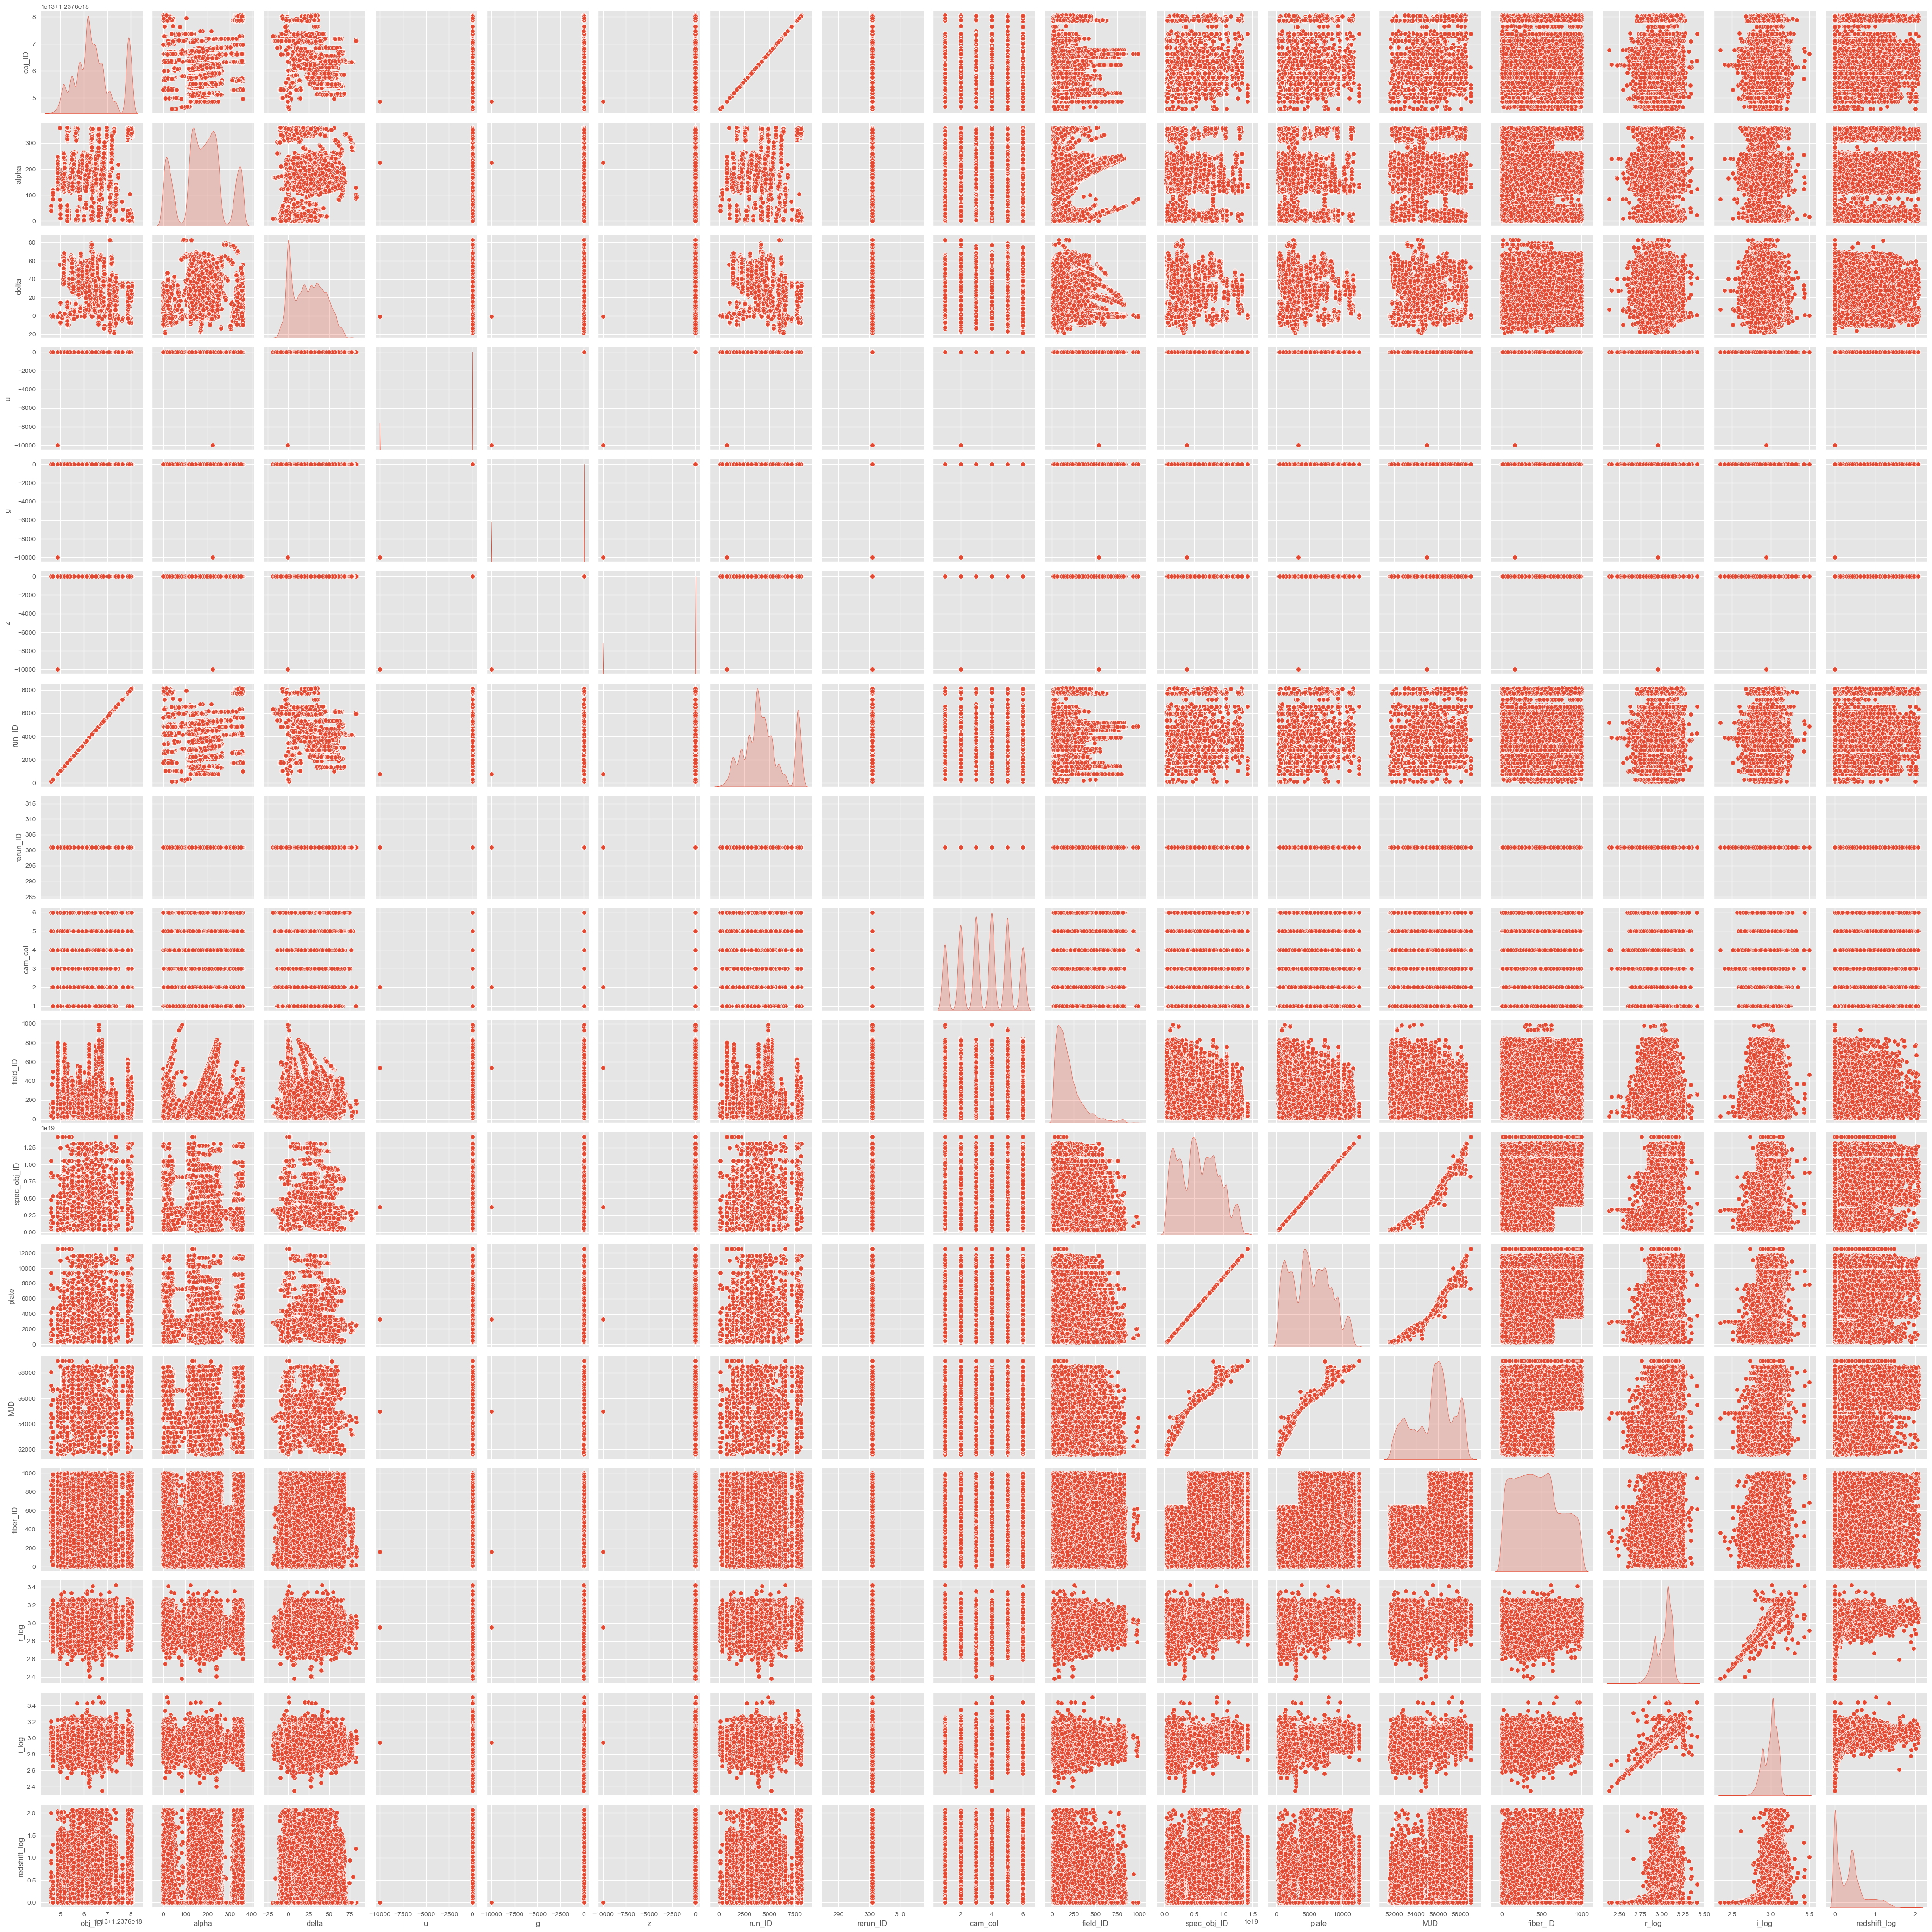

In [38]:
df_numeric = df[num_list]
sns.pairplot(df_numeric, diag_kind = "kde")
plt.show()

In [66]:
corr = df.corr()

In [68]:
corr["class"].sort_values()

redshift_log   -0.185826
r_log          -0.077490
fiber_ID       -0.041586
run_ID         -0.036014
obj_ID         -0.036012
field_ID       -0.034833
u              -0.024645
g              -0.020066
alpha          -0.011756
spec_obj_ID    -0.010060
plate          -0.010060
z              -0.001614
MJD            -0.000405
i_log           0.010499
delta           0.014452
cam_col         0.023138
class           1.000000
rerun_ID             NaN
Name: class, dtype: float64

In [70]:
df = df.drop(['obj_ID','run_ID','rerun_ID','cam_col','field_ID','fiber_ID'], axis = 1)

In [72]:
df.head()

alpha      delta         u         g         z   spec_obj_ID  class  \
0  135.689107  32.494632  23.87882  22.27530  18.79371  6.543777e+18      0   
1  144.826101  31.274185  24.77759  22.83188  21.61427  1.176014e+19      0   
2  142.188790  35.582444  25.26307  22.66389  18.94827  5.152200e+18      0   
3  338.741038  -0.402828  22.13682  23.77656  19.25010  1.030107e+19      0   
4  345.282593  21.183866  19.43718  17.58028  15.54461  6.891865e+18      0   

   plate    MJD     r_log     i_log  redshift_log  
0   5812  56354  3.063158  3.003985      0.491517  
1  10445  58158  3.160587  3.098655      0.576128  
2   4576  55592  3.073145  3.013011      0.497251  
3   9149  58039  3.118464  3.068264      0.658735  
4   6121  56187  2.862056  2.831866      0.109861

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Dealing with Imbalance</h1>

In [75]:
x = df.drop(["class"], axis = 1)
y = df.loc[:,"class"].values

In [77]:
x.head()

alpha      delta         u         g         z   spec_obj_ID  plate  \
0  135.689107  32.494632  23.87882  22.27530  18.79371  6.543777e+18   5812   
1  144.826101  31.274185  24.77759  22.83188  21.61427  1.176014e+19  10445   
2  142.188790  35.582444  25.26307  22.66389  18.94827  5.152200e+18   4576   
3  338.741038  -0.402828  22.13682  23.77656  19.25010  1.030107e+19   9149   
4  345.282593  21.183866  19.43718  17.58028  15.54461  6.891865e+18   6121   

     MJD     r_log     i_log  redshift_log  
0  56354  3.063158  3.003985      0.491517  
1  58158  3.160587  3.098655      0.576128  
2  55592  3.073145  3.013011      0.497251  
3  58039  3.118464  3.068264      0.658735  
4  56187  2.862056  2.831866      0.109861

In [79]:
y

array([0, 0, 0, ..., 0, 0, 0])

In [81]:
sm = SMOTE(random_state=42)
print('Original dataset shape %s' % Counter(y))
x, y = sm.fit_resample(x, y)
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({0: 59445, 2: 21594, 1: 18961})
Resampled dataset shape Counter({0: 59445, 1: 59445, 2: 59445})


<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Standardization</h1>

* Standardize features by removing the mean and scaling to unit variance.

In [84]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Principal Component Analysis</h1>

* PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible.

In [88]:
y=pd.DataFrame(y,columns=["class"])

In [90]:
pca = PCA(0.95)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
            , columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4','principal component 5','principal component 6'])

In [92]:
finalDf = pd.concat([principalDf, y[['class']]], axis = 1)

In [94]:
finalDf.head()

principal component 1  principal component 2  principal component 3  \
0              -0.505796              -0.022105               0.008716   
1              -3.223775               0.251424              -0.009056   
2              -0.068316              -0.138245               0.076336   
3              -2.471510               0.245932              -0.121842   
4               1.414724               0.070344              -1.985124   

   principal component 4  principal component 5  principal component 6  class  
0              -0.306574               0.472632               0.081553      0  
1              -0.628301              -0.001644               0.517270      0  
2               0.153689               0.824004               0.242581      0  
3               0.837829              -2.013913              -0.151212      0  
4              -0.628919              -1.936128              -0.989577      0

In [96]:
pca.explained_variance_ratio_

array([0.40202751, 0.27023411, 0.10665566, 0.0869421 , 0.07485693,
       0.05267617])

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Train Test Split</h1>

In [99]:
x_train, x_test, y_train, y_test = train_test_split(principalDf, y, test_size = 0.20, random_state = 42)

In [101]:
print("x_train: {}".format(x_train.shape))
print("x_test: {}".format(x_test.shape))
print("y_train: {}".format(y_train.shape))
print("y_test: {}".format(y_test.shape))

x_train: (142668, 6)
x_test: (35667, 6)
y_train: (142668, 1)
y_test: (35667, 1)


<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>Modelling</h1>

### Logestic Regression

In [100]:
LR = LogisticRegression(multi_class='multinomial', solver='lbfgs')
LR.fit(x_train,y_train)
y_predicted_LR = LR.predict(x_test)
score = LR.score(x_test, y_test)
LR_score_ = np.mean(score)
print('Accuracy : %.3f' % (LR_score_))

Accuracy : 0.959


In [104]:
classes = ['GALAXY','STAR','QSO']

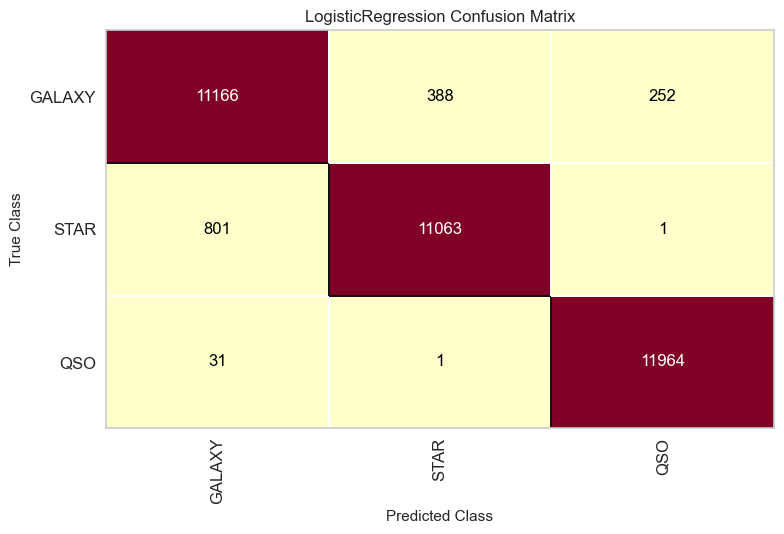

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [106]:
LR_cm = ConfusionMatrix(LR, classes=classes, cmap='YlOrRd')
LR_cm.fit(x_train, y_train)
LR_cm.score(x_test, y_test)
LR_cm.show()

In [108]:
print(classification_report(y_test, y_predicted_LR))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     11806
           1       0.97      0.93      0.95     11865
           2       0.98      1.00      0.99     11996

    accuracy                           0.96     35667
   macro avg       0.96      0.96      0.96     35667
weighted avg       0.96      0.96      0.96     35667



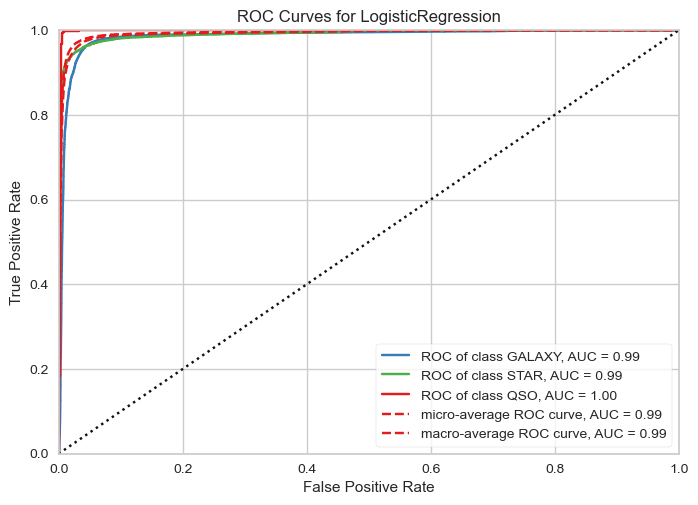

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [110]:
visualizer = ROCAUC(LR, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

### Decision Tree

In [113]:
decision_tree_classification = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
decision_tree_classification.fit(x_train, y_train)
y_predicted_DT = decision_tree_classification.predict(x_test)
score = decision_tree_classification.score(x_test, y_test)
DT_score_ = np.mean(score)
print('Accuracy : %.3f' % (DT_score_))

Accuracy : 0.941


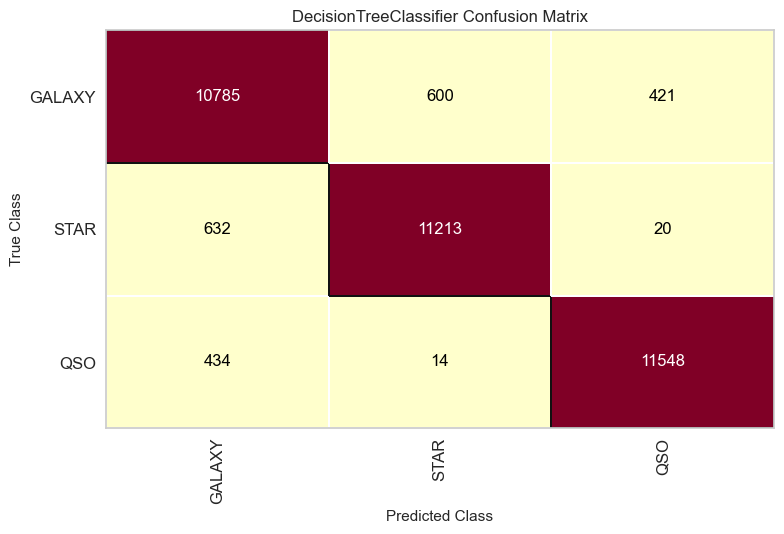

<Axes: title={'center': 'DecisionTreeClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [115]:
DT_cm = ConfusionMatrix(decision_tree_classification, classes=classes, cmap='YlOrRd')
DT_cm.fit(x_train, y_train)
DT_cm.score(x_test, y_test)
DT_cm.show()

In [117]:
print(classification_report(y_test, y_predicted_DT))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91     11806
           1       0.95      0.95      0.95     11865
           2       0.96      0.96      0.96     11996

    accuracy                           0.94     35667
   macro avg       0.94      0.94      0.94     35667
weighted avg       0.94      0.94      0.94     35667



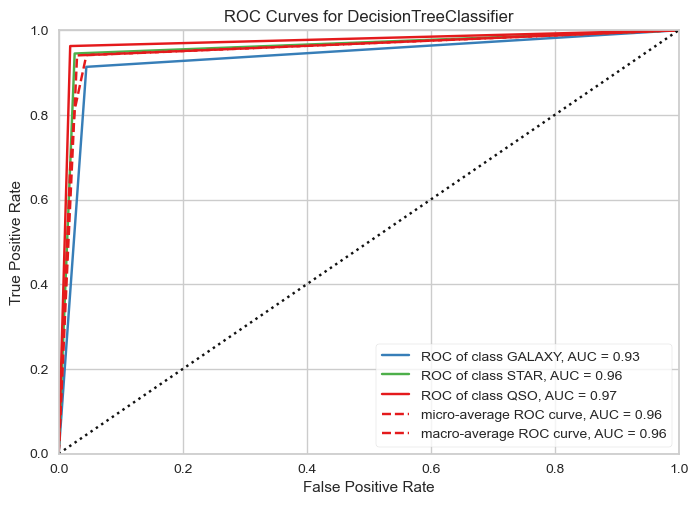

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [119]:
visualizer = ROCAUC(decision_tree_classification, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

In [121]:
# create a dictionary with hyperparameters and its values
# pass the criteria 'entropy' and 'gini' to the parameter, 'criterion' 
# pass the range of values to 'max_depth' that assigns maximum depth of the tree
# 'max_features' assigns maximum number of features to consider for the best split. We pass the string 'sqrt' and 'log2'
# 'sqrt' considers maximum number of features equal to the square root of total features
# 'log2' considers maximum number of features equal to the log of total features with base 2
# pass the range of values to 'min_samples_split' that assigns minimum number of samples to split an internal node
# pass the range of values to 'min_samples_leaf' that assigns minimum number of samples required at the terminal/leaf node
# pass the range of values to 'max_leaf_nodes' that assigns maximum number of leaf nodes in the tree
#tuned_paramaters = [{'criterion': ['entropy', 'gini'], 
#                     'max_depth': range(2, 10),
#                     'max_features': ["sqrt", "log2"],
#                     'min_samples_split': range(2,10),
#                     'min_samples_leaf': range(1,10),
#                     'max_leaf_nodes': range(1, 10)}]
 
# instantiate the 'DecisionTreeClassifier' 
# pass the 'random_state' to obtain the same samples for each time you run the code
#decision_tree_classification = DecisionTreeClassifier(random_state = 10)

# use GridSearchCV() to find the optimal value of the hyperparameters
# estimator: pass the decision tree classifier model
# param_grid: pass the list 'tuned_parameters'
# cv: number of folds in k-fold i.e. here cv = 5
#tree_grid = GridSearchCV(estimator = decision_tree_classification, 
#                         param_grid = tuned_paramaters, 
#                         cv = 5)

# fit the model on X_train and y_train using fit()
#tree_grid_model = tree_grid.fit(x_train, y_train)

# get the best parameters
#print('Best parameters for decision tree classifier: ', tree_grid_model.best_params_, '\n')

### Random Forest

In [135]:
RFC = RandomForestClassifier(random_state=42)
RFC.fit(x_train,y_train)
y_predicted = RFC.predict(x_test)
score = RFC.score(x_test, y_test)
rf_score_ = np.mean(score)
print('Accuracy : %.3f' % (rf_score_))

Accuracy : 0.964


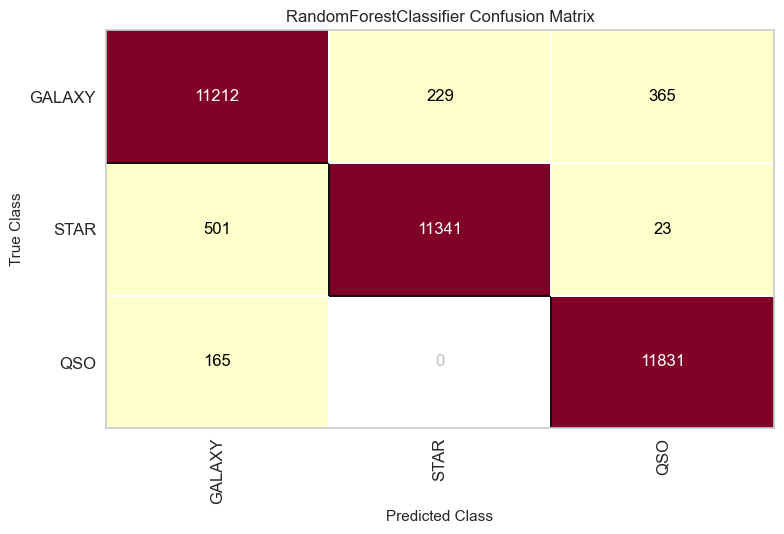

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [137]:
RFC_cm = ConfusionMatrix(RFC, classes=classes, cmap='YlOrRd')
RFC_cm.fit(x_train, y_train)
RFC_cm.score(x_test, y_test)
RFC_cm.show()

In [139]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95     11806
           1       0.98      0.96      0.97     11865
           2       0.97      0.99      0.98     11996

    accuracy                           0.96     35667
   macro avg       0.96      0.96      0.96     35667
weighted avg       0.96      0.96      0.96     35667



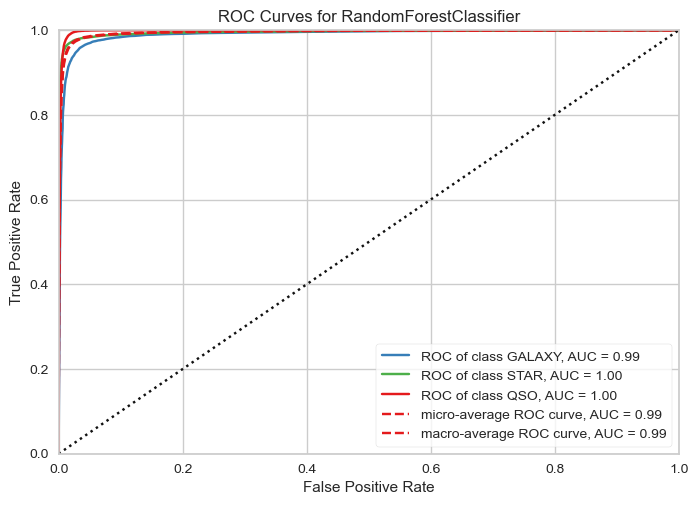

<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [141]:
visualizer = ROCAUC(RFC, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

### KNN (K-Nearest Neighbors)

In [144]:
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)
y_predicted_KNN = KNN.predict(x_test)
score = KNN.score(x_test, y_test)
KNN_score_ = np.mean(score)
print('Accuracy : %.3f' % (KNN_score_))

Accuracy : 0.956


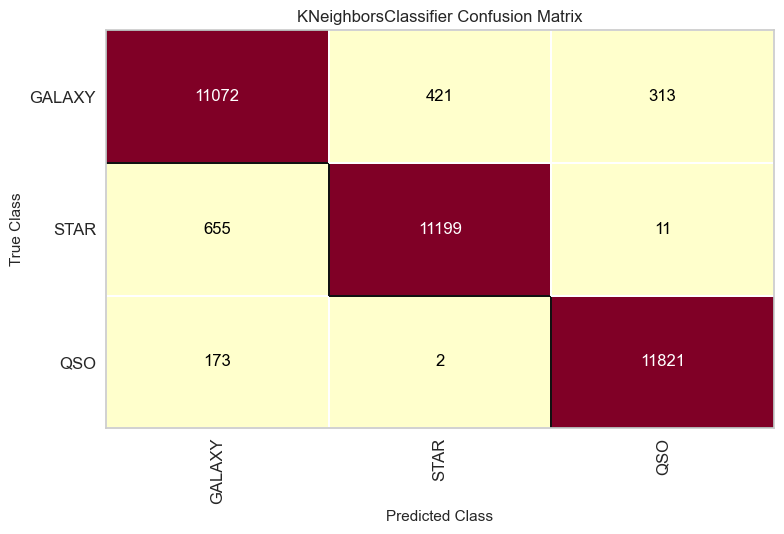

<Axes: title={'center': 'KNeighborsClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [146]:
KNN_cm = ConfusionMatrix(KNN, classes=classes, cmap='YlOrRd')
KNN_cm.fit(x_train, y_train)
KNN_cm.score(x_test, y_test)
KNN_cm.show()

In [148]:
print(classification_report(y_test, y_predicted_KNN))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93     11806
           1       0.96      0.94      0.95     11865
           2       0.97      0.99      0.98     11996

    accuracy                           0.96     35667
   macro avg       0.96      0.96      0.96     35667
weighted avg       0.96      0.96      0.96     35667



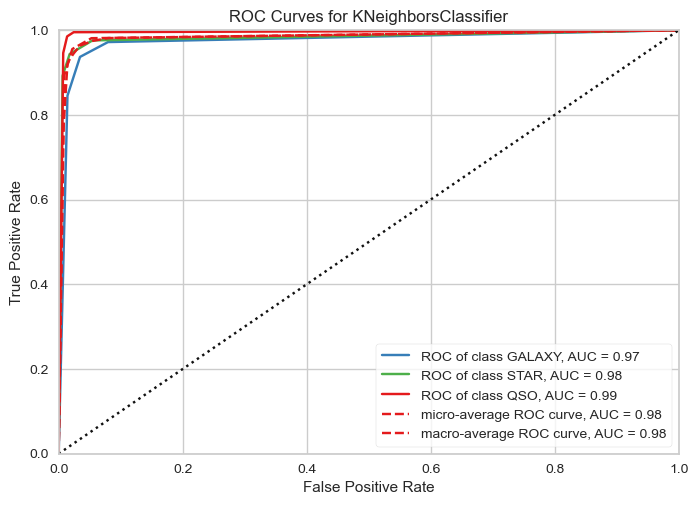

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [150]:
visualizer = ROCAUC(KNN, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()   

### Support Vector Machine

In [124]:
svm_clf = svm.SVC(kernel='rbf', C=10, random_state=42)
svm_clf.fit(x_train,y_train)
predicted = svm_clf.predict(x_test)
score = svm_clf.score(x_test, y_test)
svm_score_ = np.mean(score)

print('Accuracy : %.3f' % (svm_score_))

Accuracy : 0.971


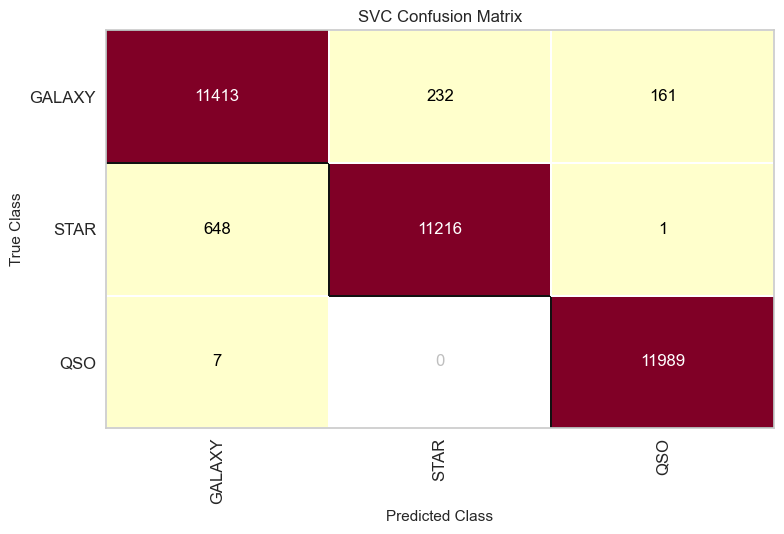

<Axes: title={'center': 'SVC Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [128]:
svm_cm = ConfusionMatrix(svm_clf, classes=classes, cmap='YlOrRd')
svm_cm.fit(x_train, y_train)
svm_cm.score(x_test, y_test)
svm_cm.show()

In [130]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96     11806
           1       0.98      0.95      0.96     11865
           2       0.99      1.00      0.99     11996

    accuracy                           0.97     35667
   macro avg       0.97      0.97      0.97     35667
weighted avg       0.97      0.97      0.97     35667



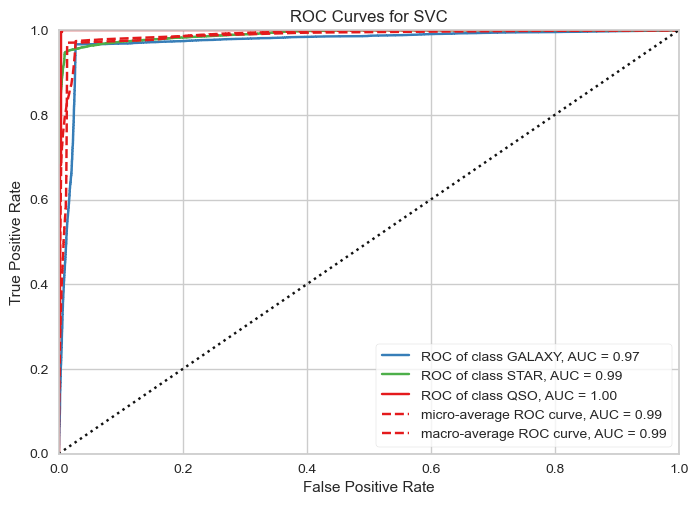

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [187]:
visualizer = ROCAUC(svm_clf, classes=classes)
set_palette('bold')
visualizer.fit(x_train, y_train)        
visualizer.score(x_test, y_test)       
visualizer.show()                      

<h1 style='background-color:#697565; color:#ECDFCC; height:30px; padding:15px;'>conclusion</h1>

In [193]:
print('Accuracy for Support Vector Machine : \t%.3f' % (svm_score_))
print('Accuracy for KNN : \t%.3f' % (KNN_score_))
print('Accuracy for Random Forest: \t%.3f' % (rf_score_))
print('Accuracy for Decision Tree: \t%.3f' % (DT_score_))
print('Accuracy for Logestic Regression: \t%.3f' % (LR_score_))

Accuracy for Support Vector Machine : 	0.971
Accuracy for KNN : 	0.956
Accuracy for Random Forest: 	0.964
Accuracy for Decision Tree: 	0.941
Accuracy for Logestic Regression: 	0.959
